# Salary Prediction from LinkedIn Job Postings - Investigate Salary

## Setup

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import salary

/var/folders/vm/77wrgjgj5wzbyghx353b7gym0000gn/T/ipykernel_51662/3935019818.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, numpy as np


In [2]:
sns.set_theme()

## Read Data

In [3]:
df_jobs = pd.read_csv('data/jobs_clean.csv')

In [4]:
df_jobs

,job_id,title,location,location_state,description,formatted_work_type,formatted_experience_level,remote_allowed,company_country,company_state,company_city,company_description,company_employee_count,normalized_salary,normalized_salary_log10,min_salary,max_salary,med_salary,pay_period
0,921716,Marketing Coordinator,"Princeton, NJ",NJ,Job descriptionA leading real estate firm in N...,Full-time,Unknown,0.0,US,NJ,Jersey City,With years of experience helping local buyers ...,402.0,38480.0,4.585235,17.0,20.0,NaN,HOURLY
1,1829192,Mental Health Therapist/Counselor,"Fort Collins, CO",CO,"At Aspen Therapy and Wellness , we are committ...",Full-time,Unknown,0.0,Unknown,Unknown,Unknown,NaN,NaN,83200.0,4.920123,30.0,50.0,NaN,HOURLY
2,10998357,Assitant Restaurant Manager,"Cincinnati, OH",OH,The National Exemplar is accepting application...,Full-time,Unknown,0.0,US,Ohio,Mariemont,"In April of 1983, The National Exemplar began ...",15.0,55000.0,4.740363,45000.0,65000.0,NaN,YEARLY
3,23221523,Senior Elder Law / Trusts and Estates Associat...,"New Hyde Park, NY",NY,Senior Associate Attorney - Elder Law / Trusts...,Full-time,Unknown,0.0,US,New York,Lake Success,"Abrams Fensterman, LLP is a full-service law f...",222.0,157500.0,5.197281,140000.0,175000.0,NaN,YEARLY
4,35982263,Service Technician,"Burlington, IA",IA,Looking for HVAC service tech with experience ...,Full-time,Unknown,0.0,Unknown,Unknown,Unknown,NaN,NaN,70000.0,4.845098,60000.0,80000.0,NaN,YEARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35599,3906265414,Contract Administrator,"Irvine, CA",CA,"Position: Clinical Contracts Analyst, Req#: 63...",Contract,Mid-Senior level,0.0,US,MA,Natick,"Founded in 2002, TalentBurst is an MBE and JCC...",668.0,83200.0,4.920123,35.0,45.0,NaN,HOURLY
35600,3906266165,Catering Event Manager,Greater Indianapolis,Unknown,This role handles all the onsite catering and ...,Part-time,Associate,0.0,US,Indiana,Indianapolis,Athena Recruiting provides recruitment service...,5.0,57500.0,4.759668,50000.0,65000.0,NaN,YEARLY
35601,3906266272,Quality Engineer,"Irvine, CA",CA,Position: Quality Engineer I (Complaint Invest...,Contract,Mid-Senior level,0.0,US,MA,Natick,"Founded in 2002, TalentBurst is an MBE and JCC...",668.0,83200.0,4.920123,30.0,50.0,NaN,HOURLY
35602,3906267117,Title IX/Investigations Attorney,"Walnut Creek, CA",CA,Our Walnut Creek office is currently seeking a...,Full-time,Mid-Senior level,0.0,US,California,Fresno,"For more than 30 years, Lozano Smith has serve...",185.0,157500.0,5.197281,120000.0,195000.0,NaN,YEARLY


## Investigate Salary

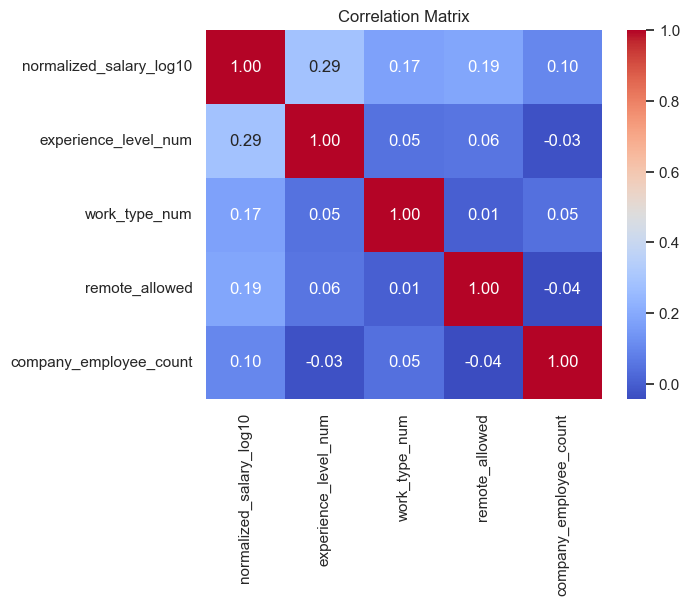

In [5]:
'''
See how numerical columns impact log10 normalized salaries.
It seems like experience level, work type, remote allowed and company employee count have a weak positive correlation.
'''
correlation_matrix = df_jobs.assign(
    experience_level_num=salary.experience_level_encoder.fit_transform(df_jobs[['formatted_experience_level']]),
    work_type_num=salary.work_type_encoder.fit_transform(df_jobs[['formatted_work_type']])
)[
    ['normalized_salary_log10', 'experience_level_num', 'work_type_num', 'remote_allowed', 'company_employee_count']
].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [6]:
'''
See how "location_state" impact log10 normalized salaries.
It is clear that the job's state affects salaries.
'''
df_jobs.groupby('location_state')[['normalized_salary', 'normalized_salary_log10']].mean().sort_values(by='normalized_salary', ascending=False)

,normalized_salary,normalized_salary_log10
location_state,,
Unknown,117177.304762,5.007158
CA,106560.926344,4.960491
WA,104137.542956,4.952681
NY,103798.333548,4.945124
MA,101968.967950,4.947975
NJ,99178.133326,4.934636
VA,98623.912431,4.925304
AK,96664.948958,4.926563
IL,95187.492292,4.911318
